# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.12.0-iota.new.362.366.367.fix.360.373.solving.357.359'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


195

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **16th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Holy See'],
 3: ['Grenada', 'Fiji', 'Tanzania'],
 4: ['Dominica', 'Saint Vincent and the Grenadines', 'Saint Lucia'],
 5: ['Equatorial Guinea', 'Brunei', 'Seychelles'],
 6: ['Antigua and Barbuda', 'Northern Mariana Islands', 'Cambodia'],
 7: ['Kazakhstan', 'Mauritius', 'Gambia', 'Liechtenstein'],
 8: ['Malawi', 'Bahamas', 'Republic of the Congo', 'Lesotho',
     'Virgin Islands, U.S.', 'Kyrgyzstan', 'Madagascar', 'Trinidad and Tobago',
     'Vietnam', 'Sao Tome and Principe'],
 9: ['Zambia', 'Guam', 'Uzbekistan', 'Burundi', 'Barbados', 'Swaziland',
     'Rwanda', 'Eritrea', 'Bhutan', 'Oman', 'Guyana', 'Monaco', 'Senegal',
     'Suriname', 'Venezuela', 'Mongolia', 'Bolivia', 'South Africa', 'Benin',
     'Australia', 'Zimbabwe', 'Singapore', 'Namibia', 'Ghana', 'Djibouti'],
 10: ['Comoros', 'El Salvador', 'Belize', 'Philippines', 'Bahrain', 'Chile',
      'Ethiopia', 'Myanmar', 'Jamaica', 'Dominican Republic', 'Saudi Arabia',
      'New Zealand', 'Bangladesh', 'Bermuda', 'Honduras

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=16)
# The number of countries
len(analyser.countries)

4

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{16: ['Canada', 'Finland', 'Portugal'], 17: ['Spain']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Spain   0th    Past  05Mar2020  25Mar2020    46796540
        1st    Past  26Mar2020  07Apr2020    46796540
        2nd    Past  08Apr2020  30Apr2020    46796540
        3rd    Past  01May2020  23Jul2020    46796540
        4th    Past  24Jul2020  13Aug2020    46796540
        5th    Past  14Aug2020  27Aug2020    46796540
        6th    Past  28Aug2020  08Sep2020    46796540
        7th    Past  09Sep2020  17Sep2020    46796540
        8th    Past  18Sep2020  27Sep2020    46796540
        9th    Past  28Sep2020  07Oct2020    46796540
        10th   Past  08Oct2020  15Oct2020    46796540
        11th   Past  16Oct2020  22Oct2020    46796540
        12th   Past  23Oct2020  29Oct2020    46796540
        13th   Past  30Oct2020  05Nov2020    46796540
        14th   Past  06Nov2020  12Nov2020    46796540
        15th   Past  13Nov2020  19Nov2020    46796540
        16th   Past  20Nov2020  02Dec2020    46796540

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	CAN,  9th phase (05Oct2020 - 16Oct2020): finished  191 trials in 0 min 10 sec

	CAN,  1st phase (06Apr2020 - 18Apr2020): finished  191 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 01Apr2020): finished  186 trials in 0 min 10 sec

	CAN,  7th phase (30Aug2020 - 20Sep2020): finished  182 trials in 0 min 10 sec

	ESP,  6th phase (28Aug2020 - 08Sep2020): finished  141 trials in 0 min 10 sec

	CAN, 10th phase (17Oct2020 - 26Oct2020): finished  136 trials in 0 min 10 sec

	ESP, 14th phase (06Nov2020 - 12Nov2020): finished  142 trials in 0 min 10 sec

	ESP,  0th phase (05Mar2020 - 25Mar2020): finished  138 trials in 0 min 10 sec

	CAN,  3rd phase (02May2020 - 18May2020): finished  158 trials in 0 min 10 sec

	ESP, 13th phase (30Oct2020 - 05Nov2020): finished  153 trials in 0 min 10 sec

	FIN, 10th phase (20Oct2020 - 28Oct2020): finished  155 trials in 0 min 10 sec

	PRT,  8th phase (24Sep2020 - 07Oct2020): finished  160 trials in 0 min 10 sec

	ESP,  5th phase (14Aug2020 - 27Aug2020): finished  175 trials in 0 min 10 sec

	PRT,  4th phase (15Jun2020 - 08Jul2020): finished  176 trials in 0 min 10 sec

	CAN, 12th phase (05Nov2020 - 11Nov2020): finished  183 trials in 0 min 10 sec

	CAN, 11th phase (27Oct2020 - 04Nov2020): finished  178 trials in 0 min 10 sec

	ESP,  2nd phase (08Apr2020 - 30Apr2020): finished  161 trials in 0 min 10 sec

	CAN,  6th phase (23Jul2020 - 29Aug2020): finished  149 trials in 0 min 10 sec

	FIN, 11th phase (29Oct2020 - 04Nov2020): finished  137 trials in 0 min 10 sec

	FIN,  3rd phase (02May2020 - 20May2020): finished  150 trials in 0 min 10 sec

	PRT, 11th phase (23Oct2020 - 28Oct2020): finished  142 trials in 0 min 10 sec

	PRT, 13th phase (05Nov2020 - 14Nov2020): finished  142 trials in 0 min 10 sec

	ESP,  3rd phase (01May2020 - 23Jul2020): finished  120 trials in 0 min 10 sec

	FIN,  7th phase (24Sep2020 - 04Oct2020): finished  141 trials in 0 min 10 sec

	ESP,  1st phase (26Mar2020 - 07Apr2020): finished  127 trials in 0 min 10 sec

	FIN,  4th phase (21May2020 - 06Aug2020): finished  108 trials in 0 min 10 sec

	ESP, 16th phase (20Nov2020 - 02Dec2020): finished  123 trials in 0 min 10 sec

	FIN,  9th phase (12Oct2020 - 19Oct2020): finished  128 trials in 0 min 10 sec

	ESP,  7th phase (09Sep2020 - 17Sep2020): finished  141 trials in 0 min 10 sec

	CAN,  8th phase (21Sep2020 - 04Oct2020): finished  133 trials in 0 min 10 sec

	CAN, 15th phase (26Nov2020 - 02Dec2020): finished  126 trials in 0 min 10 sec

	ESP, 11th phase (16Oct2020 - 22Oct2020): finished  139 trials in 0 min 10 sec

	CAN,  4th phase (19May2020 - 08Jun2020): finished  150 trials in 0 min 10 sec

	FIN, 13th phase (12Nov2020 - 19Nov2020): finished  150 trials in 0 min 10 sec

	PRT,  3rd phase (18May2020 - 14Jun2020): finished  145 trials in 0 min 10 sec

	CAN, 14th phase (19Nov2020 - 25Nov2020): finished  157 trials in 0 min 10 sec

	FIN,  2nd phase (18Apr2020 - 01May2020): finished  164 trials in 0 min 10 sec

	FIN,  0th phase (16Mar2020 - 04Apr2020): finished  160 trials in 0 min 10 sec

	FIN,  1st phase (05Apr2020 - 17Apr2020): finished  160 trials in 0 min 10 sec

	PRT,  5th phase (09Jul2020 - 12Aug2020): finished  149 trials in 0 min 10 sec

	CAN,  2nd phase (19Apr2020 - 01May2020): finished  150 trials in 0 min 10 sec

	ESP,  4th phase (24Jul2020 - 13Aug2020): finished  145 trials in 0 min 10 sec

	ESP, 10th phase (08Oct2020 - 15Oct2020): finished  140 trials in 0 min 10 sec

	CAN, 13th phase (12Nov2020 - 18Nov2020): finished  139 trials in 0 min 10 sec

	ESP, 15th phase (13Nov2020 - 19Nov2020): finished  156 trials in 0 min 10 sec

	ESP,  8th phase (18Sep2020 - 27Sep2020): finished  151 trials in 0 min 10 sec

	ESP,  9th phase (28Sep2020 - 07Oct2020): finished  146 trials in 0 min 10 sec

	PRT,  2nd phase (19Apr2020 - 17May2020): finished  147 trials in 0 min 10 sec

	PRT,  6th phase (13Aug2020 - 08Sep2020): finished  222 trials in 0 min 10 sec

	CAN,  0th phase (02Mar2020 - 05Apr2020): finished  227 trials in 0 min 10 sec

	PRT,  1st phase (02Apr2020 - 18Apr2020): finished  242 trials in 0 min 10 sec

	CAN,  5th phase (09Jun2020 - 22Jul2020): finished  197 trials in 0 min 10 sec

	FIN,  8th phase (05Oct2020 - 11Oct2020): finished  215 trials in 0 min 10 sec

	PRT, 14th phase (15Nov2020 - 24Nov2020): finished  203 trials in 0 min 10 sec

	FIN,  6th phase (08Sep2020 - 23Sep2020): finished  205 trials in 0 min 10 sec

	FIN, 14th phase (20Nov2020 - 25Nov2020): finished  211 trials in 0 min 10 sec

	PRT,  7th phase (09Sep2020 - 23Sep2020): finished  210 trials in 0 min 10 sec

	FIN,  5th phase (07Aug2020 - 07Sep2020): finished  189 trials in 0 min 10 sec

	ESP, 12th phase (23Oct2020 - 29Oct2020): finished  195 trials in 0 min 10 sec

	PRT, 15th phase (25Nov2020 - 02Dec2020): finished  201 trials in 0 min 10 sec

Completed optimization. Total: 3 min  7 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE     Rt     theta  \
Country Phase                                                                   
Spain   0th    Past  05Mar2020  25Mar2020    46796540  SIR-F  14.71  0.038008   
        1st    Past  26Mar2020  07Apr2020    46796540  SIR-F   6.63  0.039847   
        2nd    Past  08Apr2020  30Apr2020    46796540  SIR-F   3.43  0.096354   
        3rd    Past  01May2020  23Jul2020    46796540  SIR-F   0.25  0.383279   
        4th    Past  24Jul2020  13Aug2020    46796540  SIR-F   6.79  0.003232   
        5th    Past  14Aug2020  27Aug2020    46796540  SIR-F   6.00  0.029141   
        6th    Past  28Aug2020  08Sep2020    46796540  SIR-F   2.20  0.104850   
        7th    Past  09Sep2020  17Sep2020    46796540  SIR-F   2.21  0.168246   
        8th    Past  18Sep2020  27Sep2020    46796540  SIR-F   0.14  0.306200   
        9th    Past  28Sep2020  07Oct2020    46796540  SIR-F   0.47  0.354494   
        10th   Past  08Oct2020  15Oct2020    46796540  SIR-F   1.21  0.190437   
        11th   Past  16Oct2020  22Oct2020    46796540  SIR-F   1.11  0.101603   
        12th   Past  23Oct2020  29Oct2020    46796540  SIR-F   1.39  0.002300   
        13th   Past  30Oct2020  05Nov2020    46796540  SIR-F   1.30  0.032026   
        14th   Past  06Nov2020  12Nov2020    46796540  SIR-F   2.63  0.036325   
        15th   Past  13Nov2020  19Nov2020    46796540  SIR-F   0.83  0.037922   
        16th   Past  20Nov2020  02Dec2020    46796540  SIR-F   0.99  0.035908   

                  kappa       rho     sigma  tau  1/alpha2 [day]  \
Country Phase                                                      
Spain   0th    0.001551  0.061817  0.002492  360             161   
        1st    0.001707  0.022637  0.001570  360             146   
        2nd    0.000540  0.003949  0.000500  360             463   
        3rd    0.000530  0.004457  0.010402  360             471   
        4th    0.000309  0.017902  0.002319  360             808   
        5th    0.000054  0.014534  0.002297  360            4601   
        6th    0.000149  0.008122  0.003162  360            1683   
        7th    0.000149  0.010303  0.003735  360            1683   
        8th    0.000079  0.000768  0.003717  360            3152   
        9th    0.000067  0.003941  0.005297  360            3713   
        10th   0.000054  0.007602  0.005035  360            4601   
        11th   0.000093  0.008342  0.006653  360            2690   
        12th   0.000071  0.009135  0.006486  360            3514   
        13th   0.000054  0.007904  0.005839  360            4601   
        14th   0.000093  0.011802  0.004227  360            2685   
        15th   0.000079  0.003454  0.003905  360            3162   
        16th   0.000692  0.003506  0.002734  360             361   

               1/beta [day]  1/gamma [day]  alpha1 [-]     RMSLE  Trials  \
Country Phase                                                              
Spain   0th               4            100       0.038  0.789681     138   
        1st              11            159       0.040  0.112623     127   
        2nd              63            500       0.096  0.117789     161   
        3rd              56             24       0.383  0.454890     120   
        4th              13            107       0.003  0.041718     145   
        5th              17            108       0.029  0.037052     175   
        6th              30             79       0.105  0.097450     141   
        7th              24             66       0.168  0.143194     141   
        8th             325             67       0.306  0.086991     151   
        9th              63             47       0.354  0.155638     146   
        10th             32             49       0.190  0.130599     140   
        11th             29             37       0.102  0.077258     139   
        12th             27             38       0.002  0.024781     195   
        13th             31             42

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-02,Canada,0.0200421,0.000568486,0.0417727,0.000718085,0.02,439,5,348,...,0,0,0,0,0,1,0,1,1,2.78
1,2020-03-02,Canada,0.0200421,0.000568486,0.0417727,0.000718085,0.02,439,5,348,...,0,0,0,0,0,0,0,0,0,0.00
2,2020-03-02,Canada,0.0200421,0.000568486,0.0417727,0.000718085,0.02,439,5,348,...,0,0,0,0,0,0,0,0,0,0.00
3,2020-03-02,Canada,0.0200421,0.000568486,0.0417727,0.000718085,0.02,439,5,348,...,0,0,0,0,0,0,0,0,0,0.00
4,2020-03-02,Canada,0.0200421,0.000568486,0.0417727,0.000718085,0.02,439,5,348,...,0,0,0,0,0,0,0,0,0,0.00


### $Rt$: Reprodcution number $\mathrm{[-]}$

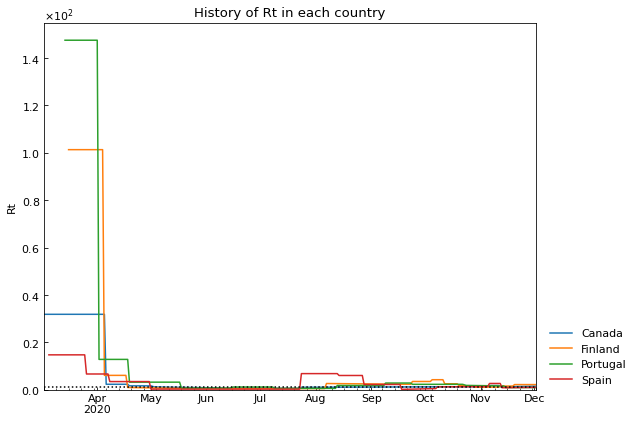

Country,Canada,Finland,Portugal,Spain
Date,,,,
2020-11-28,1.51,2.16,0.9,0.99
2020-11-29,1.51,2.16,0.9,0.99
2020-11-30,1.51,2.16,0.9,0.99
2020-12-01,1.51,2.16,0.9,0.99
2020-12-02,1.51,2.16,0.9,0.99


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

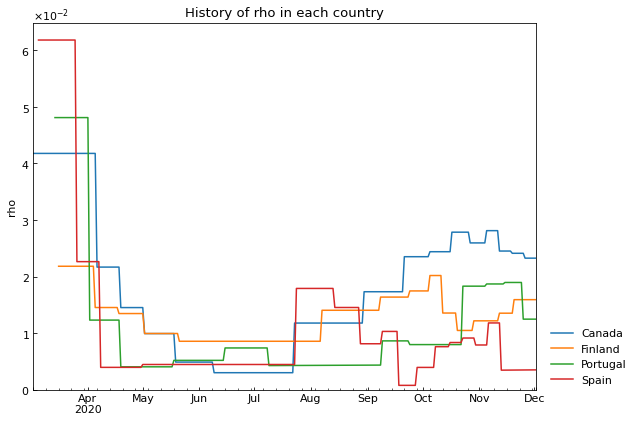

Country,Canada,Finland,Portugal,Spain
Date,,,,
2020-11-28,0.023256,0.015919,0.012472,0.003506
2020-11-29,0.023256,0.015919,0.012472,0.003506
2020-11-30,0.023256,0.015919,0.012472,0.003506
2020-12-01,0.023256,0.015919,0.012472,0.003506
2020-12-02,0.023256,0.015919,0.012472,0.003506


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

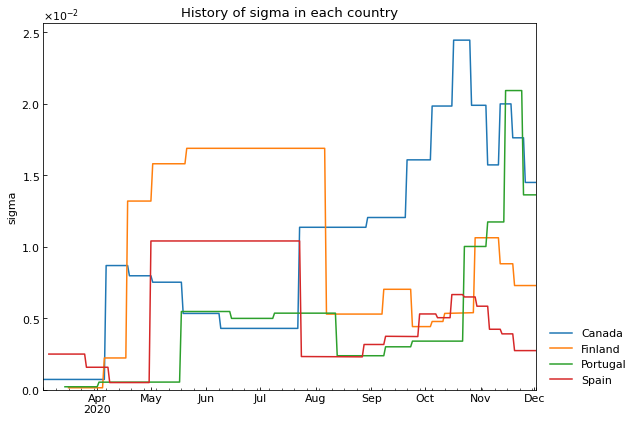

Country,Canada,Finland,Portugal,Spain
Date,,,,
2020-11-28,0.014495,0.007284,0.013627,0.002734
2020-11-29,0.014495,0.007284,0.013627,0.002734
2020-11-30,0.014495,0.007284,0.013627,0.002734
2020-12-01,0.014495,0.007284,0.013627,0.002734
2020-12-02,0.014495,0.007284,0.013627,0.002734


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

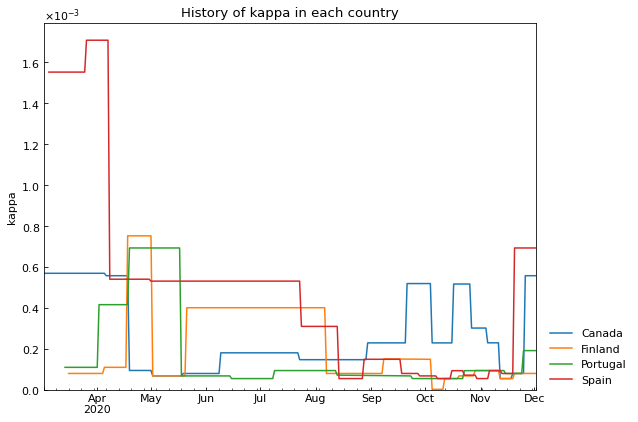

Country,Canada,Finland,Portugal,Spain
Date,,,,
2020-11-28,0.000557,0.000079,0.000191,0.000692
2020-11-29,0.000557,0.000079,0.000191,0.000692
2020-11-30,0.000557,0.000079,0.000191,0.000692
2020-12-01,0.000557,0.000079,0.000191,0.000692
2020-12-02,0.000557,0.000079,0.000191,0.000692


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

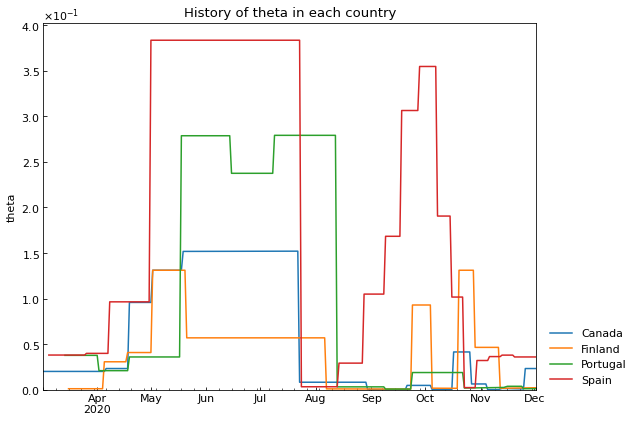

Country,Canada,Finland,Portugal,Spain
Date,,,,
2020-11-28,0.023216,0.002166,0.001095,0.035908
2020-11-29,0.023216,0.002166,0.001095,0.035908
2020-11-30,0.023216,0.002166,0.001095,0.035908
2020-12-01,0.023216,0.002166,0.001095,0.035908
2020-12-02,0.023216,0.002166,0.001095,0.035908


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11642 entries, 0 to 11683
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 11642 non-null  datetime64[ns]
 1   Country                              11642 non-null  object        
 2   Rt                                   11642 non-null  float64       
 3   theta                                11642 non-null  float64       
 4   kappa                                11642 non-null  float64       
 5   rho                                  11642 non-null  float64       
 6   sigma                                11642 non-null  float64       
 7   School_closing                       11642 non-null  int64         
 8   Workplace_closing                    11642 non-null  int64         
 9   Cancel_events                        11642 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.188054,0.081179,0.517608,-0.281807,-0.034597,-0.145922,-0.057702,-0.196785,-0.052687,-0.044759,-0.073551,-0.161711,-0.162463,-0.245434,-0.093258,-0.093711
theta,-0.188054,1.000000,-0.006021,-0.472284,0.078018,0.066769,0.364654,0.341911,0.185046,0.361578,-0.040617,0.190955,0.228718,0.077368,-0.195401,-0.352644,0.056496
kappa,0.081179,-0.006021,1.000000,0.510591,-0.151340,0.030255,-0.049325,0.106999,-0.385657,0.084880,0.123727,0.027263,0.021384,-0.059646,-0.525550,-0.148869,-0.001615
rho,0.517608,-0.472284,0.510591,1.000000,-0.001433,-0.108076,-0.484652,-0.295659,-0.630502,-0.327212,-0.214730,-0.305971,-0.325076,-0.214732,-0.215832,0.056755,-0.330207
sigma,-0.281807,0.078018,-0.151340,-0.001433,1.000000,0.222491,0.070196,-0.347360,0.046685,-0.366717,-0.176566,-0.298119,0.042156,0.119012,0.346311,0.483403,-0.121288
School_closing,-0.034597,0.066769,0.030255,-0.108076,0.222491,1.000000,0.490794,-0.362626,0.287371,-0.287557,0.088645,-0.332530,0.631361,0.273847,0.268802,0.066834,0.587758
Workplace_closing,-0.145922,0.364654,-0.049325,-0.484652,0.070196,0.490794,1.000000,0.236515,0.495207,0.317654,0.373355,0.205013,0.573136,0.324583,0.017701,-0.135623,0.582438
Cancel_events,-0.057702,0.341911,0.106999,-0.295659,-0.347360,-0.362626,0.236515,1.000000,0.266849,0.883971,0.469085,0.834497,-0.011663,0.151385,-0.447154,-0.285801,0.210406
Gatherings_restrictions,-0.196785,0.185046,-0.385657,-0.630502,0.046685,0.287371,0.495207,0.266849,1.000000,0.283105,0.456418,0.403222,0.354201,0.331514,0.289132,0.150575,0.652412
Transport_closing,-0.052687,0.361578,0.084880,-0.327212,-0.366717,-0.287557,0.317654,0.883971,0.283105,1.000000,0.547462,0.684438,-0.015153,0.131872,-0.390027,-0.280353,0.267037


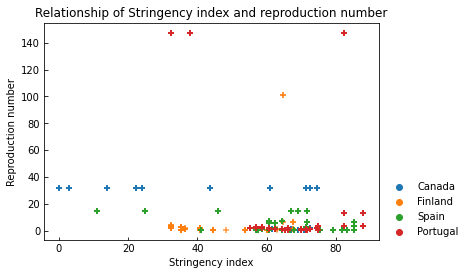

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()